# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

import seaborn as sns

from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [ ]:
# Carregar o dataset
df = pd.read_csv('/content/housing.csv')

# Visualizar as primeiras linhas do dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Verificar a presença de valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)



Valores ausentes por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Preencher valores ausentes na coluna total_bedrooms com a mediana
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Verificar tipos de dados
data_types = df.dtypes
print("Tipos de dados:")
print(data_types)

# Converter colunas categóricas em variáveis dummy
df = pd.get_dummies(df, drop_first=True)

Tipos de dados:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [ ]:
# Definir as features e target
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

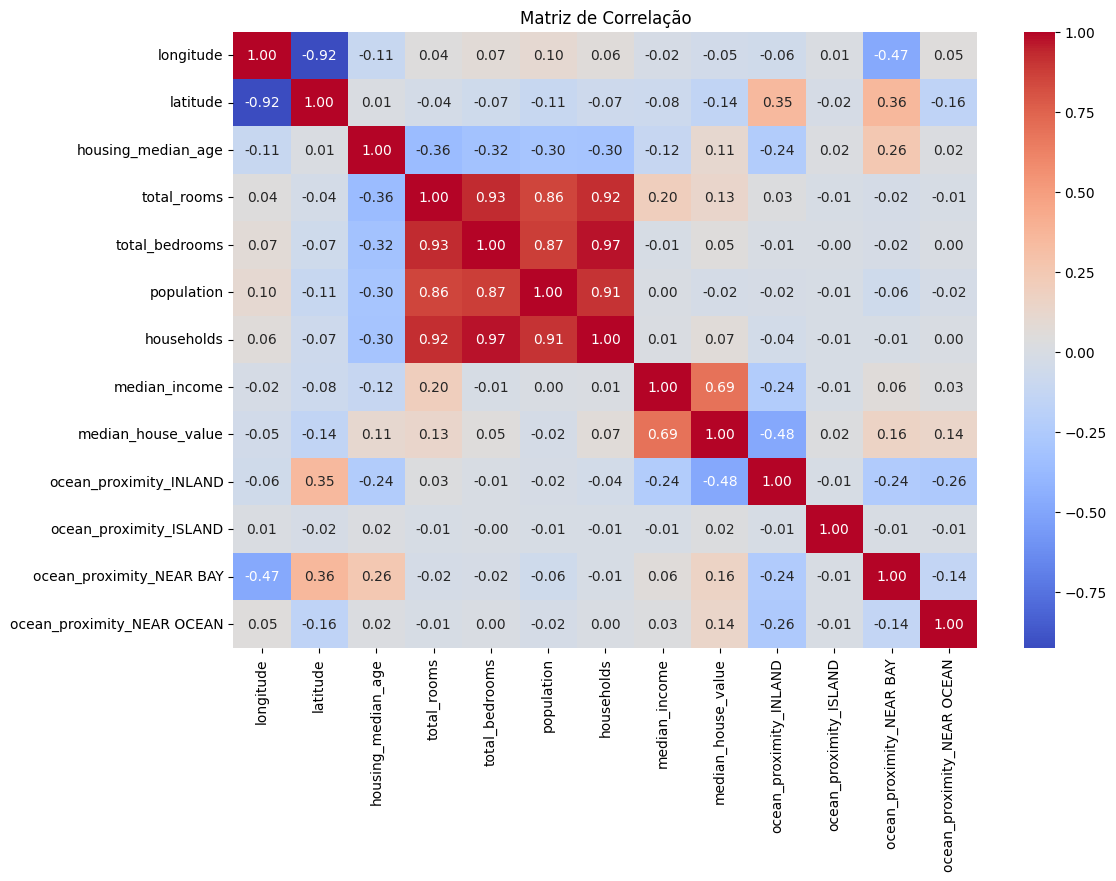

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir o conjunto de treino em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [ ]:
# Treinar o modelo com profundidade máxima = 8
model_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
model_depth_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [ ]:
# Prever e avaliar no conjunto de validação
y_val_pred_8 = model_depth_8.predict(X_val)
val_mse_8 = mean_squared_error(y_val, y_val_pred_8)
val_r2_8 = r2_score(y_val, y_val_pred_8)
print(f"Validation MSE (Depth 8): {val_mse_8}")
print(f"Validation R2 (Depth 8): {val_r2_8}")

Validation MSE (Depth 8): 4166177177.671699
Validation R2 (Depth 8): 0.6965896057341423


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
# Prever e avaliar no conjunto de validação
y_val_pred_8 = model_depth_8.predict(X_val)
val_mse_8 = mean_squared_error(y_val, y_val_pred_8)
val_r2_8 = r2_score(y_val, y_val_pred_8)
print(f"Validation MSE (Depth 8): {val_mse_8}")
print(f"Validation R2 (Depth 8): {val_r2_8}")

# Prever e avaliar no conjunto de teste
y_test_pred_8 = model_depth_8.predict(X_test)
test_mse_8 = mean_squared_error(y_test, y_test_pred_8)
test_r2_8 = r2_score(y_test, y_test_pred_8)
print(f"Test MSE (Depth 8): {test_mse_8}")
print(f"Test R2 (Depth 8): {test_r2_8}")

# Prever e avaliar no conjunto de treino
y_train_pred_8 = model_depth_8.predict(X_train)
train_mse_8 = mean_squared_error(y_train, y_train_pred_8)
train_r2_8 = r2_score(y_train, y_train_pred_8)
print(f"Train MSE (Depth 8): {train_mse_8}")
print(f"Train R2 (Depth 8): {train_r2_8}")

# Treinar o modelo com profundidade máxima = 2
model_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
model_depth_2.fit(X_train, y_train)

# Prever e avaliar no conjunto de validação
y_val_pred_2 = model_depth_2.predict(X_val)
val_mse_2 = mean_squared_error(y_val, y_val_pred_2)
val_r2_2 = r2_score(y_val, y_val_pred_2)
print(f"Validation MSE (Depth 2): {val_mse_2}")
print(f"Validation R2 (Depth 2): {val_r2_2}")

# Prever e avaliar no conjunto de teste
y_test_pred_2 = model_depth_2.predict(X_test)
test_mse_2 = mean_squared_error(y_test, y_test_pred_2)
test_r2_2 = r2_score(y_test, y_test_pred_2)
print(f"Test MSE (Depth 2): {test_mse_2}")
print(f"Test R2 (Depth 2): {test_r2_2}")

# Prever e avaliar no conjunto de treino
y_train_pred_2 = model_depth_2.predict(X_train)
train_mse_2 = mean_squared_error(y_train, y_train_pred_2)
train_r2_2 = r2_score(y_train, y_train_pred_2)
print(f"Train MSE (Depth 2): {train_mse_2}")
print(f"Train R2 (Depth 2): {train_r2_2}")

Validation MSE (Depth 8): 4166177177.671699
Validation R2 (Depth 8): 0.6965896057341423
Test MSE (Depth 8): 4015822046.9823055
Test R2 (Depth 8): 0.6935443732709183
Train MSE (Depth 8): 3162985838.698098
Train R2 (Depth 8): 0.7612130223321636
Validation MSE (Depth 2): 6832500028.543161
Validation R2 (Depth 2): 0.5024091777488191
Test MSE (Depth 2): 6896217359.579764
Test R2 (Depth 2): 0.4737354921944076
Train MSE (Depth 2): 6662264370.205243
Train R2 (Depth 2): 0.4970379083201243


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [ ]:

# Exportar a árvore de decisão para visualização
dot_data = export_graphviz(model_depth_8, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree_depth_8")  # Renderiza a árvore em um arquivo PDF


'tree_depth_8.pdf'